## KNN Classifier

In [1]:
#import the Libraries
import numpy as np                    # used for multdimensional array
import pandas as pd                   # used for import the dataset
import matplotlib.pyplot as plt       # used for plot the graph

In [2]:
#import the dataset
dataset=pd.read_csv('updated_features.csv')
X=dataset.iloc[:,:-1].values    # predictor attributes
y=dataset.iloc[:,-1].values     # target attributes
z=np.unique(y)


In [3]:
dataset.head(10)

,HRV,SDSD,SDNN,RMSSD,PNN50,TINN,HTI,PLF,PHF,LFHFRatio,VLF,LF,HF,Class
0,0.908052,0.063515,5.642670,0.918895,1.0,0.015625,5.0,80.762525,19.237475,4.198197,2.355132,0.090640,0.021664,GSVT
1,1.072700,0.180842,5.910351,1.087850,1.0,0.015625,5.0,82.000059,17.999941,4.555574,2.592221,0.129439,0.028416,AFIB
2,1.980903,0.530627,5.876639,2.050607,1.0,0.015625,3.0,79.533708,20.466292,3.886083,2.608582,0.181173,0.046686,AFIB
3,0.519595,0.420627,5.479227,0.688756,1.0,0.015625,9.5,81.805008,18.194992,4.496253,2.743589,0.070468,0.014770,GSVT
4,1.326730,0.327176,5.804215,1.366546,1.0,0.015625,4.0,81.627848,18.372152,4.443020,3.301605,0.204897,0.046112,AFIB
5,1.151367,0.003380,5.640783,1.151494,1.0,0.015625,4.0,81.832097,18.167903,4.504213,2.912595,0.148940,0.033092,GSVT
6,0.544364,0.001887,5.655564,0.544368,1.0,0.015625,9.0,81.481495,18.518505,4.400004,2.872678,0.072375,0.016454,GSVT
7,1.746484,0.208049,5.666119,1.758834,1.0,0.015625,4.0,74.536944,25.463056,2.927260,2.438525,0.144999,0.049534,SA
8,1.461238,0.119478,6.002428,1.466089,1.0,0.015625,4.0,80.329552,19.670448,4.083768,3.582712,0.207991,0.050945,SA
9,2.116211,0.046002,5.643520,2.116839,1.0,0.015625,2.5,79.317211,20.682789,3.834955,2.536577,0.194250,0.052478,SB


In [4]:
dataset.shape

(10498, 14)

In [5]:
X, y, z


(array([[0.9080522 , 0.06351525, 5.64267047, ..., 2.35513181, 0.09064038,
         0.02166391],
        [1.07269965, 0.18084231, 5.91035141, ..., 2.59222054, 0.12943917,
         0.02841598],
        [1.98090278, 0.53062713, 5.87663931, ..., 2.60858236, 0.18117265,
         0.04668575],
        ...,
        [1.93489583, 0.49294817, 5.71911251, ..., 2.40005055, 0.11820742,
         0.03514049],
        [1.51041667, 0.25044379, 5.74452631, ..., 2.04515675, 0.10314724,
         0.03724982],
        [1.25520833, 0.2512284 , 5.82067447, ..., 3.32689595, 0.17836892,
         0.0429307 ]]),
 array(['GSVT', 'AFIB', 'AFIB', ..., 'AFIB', 'AFIB', 'AFIB'], dtype=object),
 array(['AFIB', 'GSVT', 'SA', 'SB', 'SR'], dtype=object))

In [6]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
Labelencoder_y= LabelEncoder()
y= Labelencoder_y.fit_transform(y)

In [7]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [9]:
import math
n=math.sqrt(10498)
n=round(n)

In [10]:
# importing the kNN model from scikit learn
from sklearn.neighbors import KNeighborsClassifier

0.8993650793650794


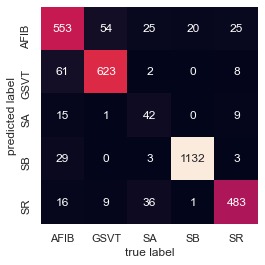

In [24]:
# init the model
from sklearn.metrics import accuracy_score

l=[]

knn= KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
ac= accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
#confusion matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=z, yticklabels=z)
plt.xlabel('true label')
plt.ylabel('predicted label');
print(ac)


In [23]:
y_pred.shape

(3150,)

In [13]:
#I have iterated above model for diffent values of K and found that:
best=max(l)
print("The highest 'Accuracy',",best[0],"is achieved when k=",best[1])
best

ValueError: max() arg is an empty sequence

In [ ]:
from sklearn.metrics import f1_score
f1= f1_score(y_test,y_pred,average="weighted")
f1

In [14]:
y_test.shape


(3150,)

In [22]:
y_pred.shape

(3150,)